# EP2.2 - Normalização e análise da variação das classes

Integrantes:
- Carolene Bertoldi
- Felipe Varella
- Renato Nunes

## Normalização do *augumentation dataset*

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import os

from google.colab import drive
from skimage import data, exposure, img_as_float, io

In [ ]:
drive.mount('/content/gdrive')

# originalGrayDataset
path = "/content/gdrive/Shareddrives/Grupo Visão/EP1/dados"

# augmentedDataset
gray_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gray"
log_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Log_corrected"
gray_grad_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gradiente_Cinza"
exponential_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Exponencial"
mean_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Filtro_media_conv"

# normalizedDataset
normalized_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Normalized_Dataset"

Mounted at /content/gdrive


Função em que está implementado o filtro de equalização das imagens.

In [ ]:
def normalized_dataset(original_path):
  os.chdir(original_path)
  files = os.listdir()

  for filename in files:
    os.chdir(original_path)
    img = image.imread(filename)
    
    # Equalization
    img_eq = exposure.equalize_hist(img)
    
    os.chdir(normalized_folder)
    
    dirname = original_path.split("/").pop()
    io.imsave(f"{dirname}-{filename}", img_eq)

In [ ]:
def plot_histogram(histogram, edges, size=10):
  plt.figure(figsize=[size,size])
  
  plt.bar(edges, histogram, width = 0.8, color='#0504aa')
  plt.xlim(min(edges), max(edges))
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Value',fontsize=15)
  plt.ylabel('Frequency',fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylabel('Frequency',fontsize=15)
  plt.title('Document Image Histogram',fontsize=15)
  plt.show()

### Imagens em RGB2gray

Aplicação do filtro de equalização partindo de imagens RGB que foram transformadas em escala de cinza.

In [ ]:
normalized_dataset(gray_folder)

Comparação de uma imagem em níveis de cinza antes e depois da equalização:

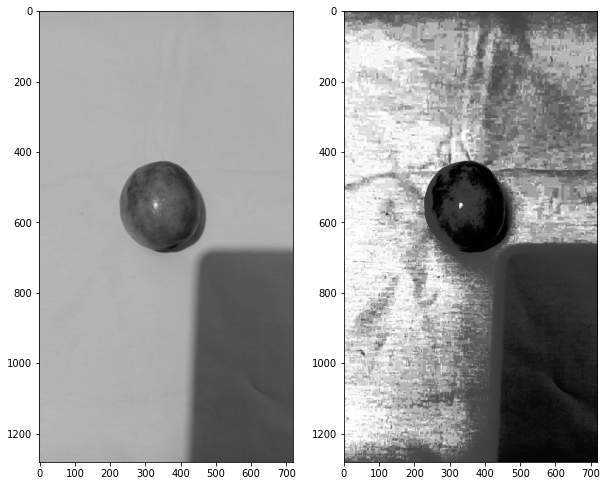

In [ ]:
sample_gray = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gray/109IN33.jpeg")
sample_nornalized = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Normalized_Dataset/Gray-109IN33.jpeg")

figure, axarr = plt.subplots(1,2, figsize=(10, 10))
axarr[0].imshow(sample_gray, cmap='gray')
axarr[1].imshow(sample_nornalized, cmap='gray')

Comparação dos histogramas das imagens em RGB2Gray antes e depois da equalização.

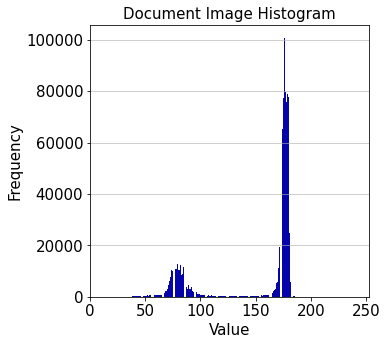

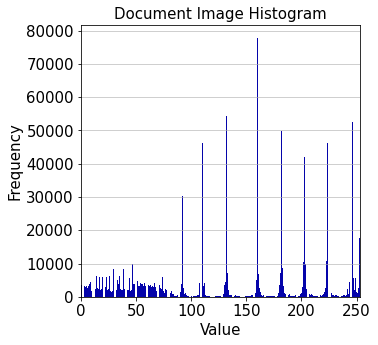

In [ ]:
histogram, edges = np.histogram(sample_gray, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

histogram_eq, edges_eq = np.histogram(sample_nornalized, bins=range(255))
plot_histogram(histogram_eq, edges_eq[:-1], 5)

### Soma de fundo com gradiente de níveis de cinza

Normalização de imagens partindo de imagens que utilizaram a soma do fundo com gradiante em grayscale.

In [ ]:
normalized_dataset(log_folder)

Comparação das imagens.

Antes, uma imagem que utilizou soma de fundo com gradiente de níveis de cinza.

Depois, a imagem anterior equalizada.

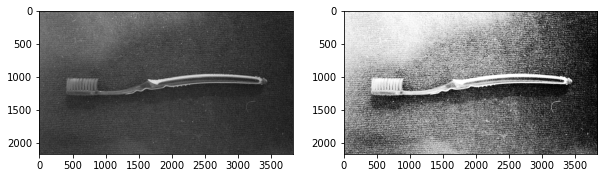

In [ ]:
sample_gray = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Log_corrected/056IN11.jpg")
sample_nornalized = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Normalized_Dataset/Log_corrected-056IN11.jpg")

figure, axarr = plt.subplots(1,2, figsize=(10, 10))
axarr[0].imshow(sample_gray, cmap='gray')
axarr[1].imshow(sample_nornalized, cmap='gray')

Comparação dos histogramas das imagens respectivas, antes e depois da equalização.

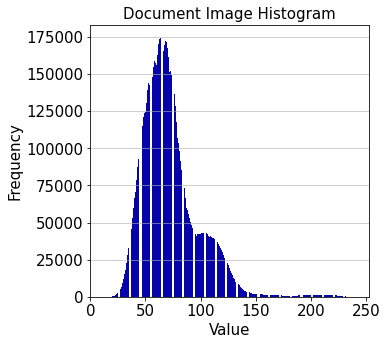

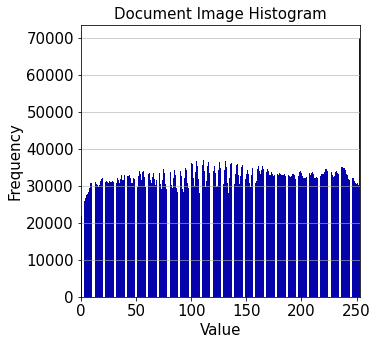

In [ ]:
histogram, edges = np.histogram(sample_gray, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

histogram_eq, edges_eq = np.histogram(sample_nornalized, bins=range(255))
plot_histogram(histogram_eq, edges_eq[:-1], 5)

### Logaritmo da imagem

Equalização a partir de imagens que sofreram o filtro de logaritmo.

In [ ]:
normalized_dataset(gray_grad_folder)

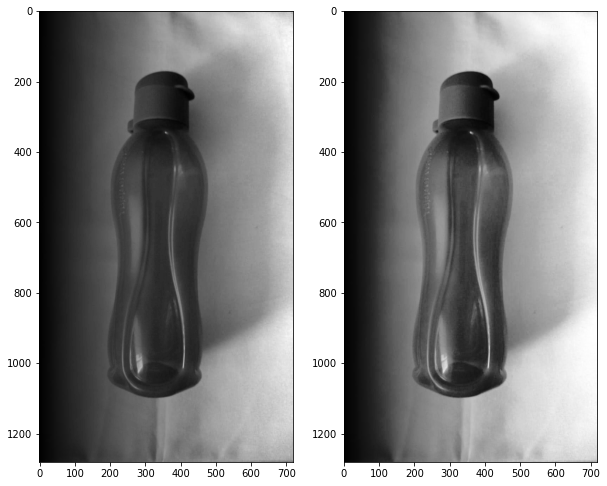

In [ ]:
sample_gray = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gradiente_Cinza/099ID21.jpeg")
sample_nornalized = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Normalized_Dataset/Gradiente_Cinza-099ID21.jpeg")

figure, axarr = plt.subplots(1,2, figsize=(10, 10))
axarr[0].imshow(sample_gray, cmap='gray')
axarr[1].imshow(sample_nornalized, cmap='gray')

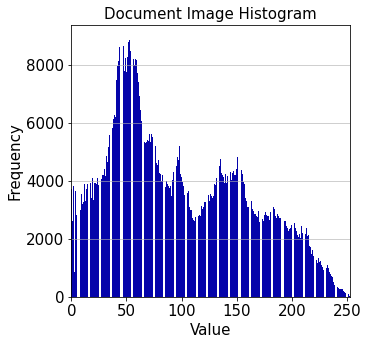

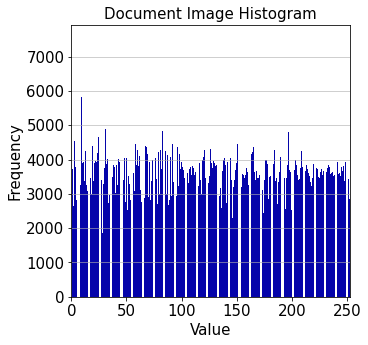

In [ ]:
histogram, edges = np.histogram(sample_gray, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

histogram_eq, edges_eq = np.histogram(sample_nornalized, bins=range(255))
plot_histogram(histogram_eq, edges_eq[:-1], 5)

### Filtro Exponencial

Aplicação do filtro de equalização partindo de imagens com filtro exponencial.

In [ ]:
normalized_dataset(exponential_folder)

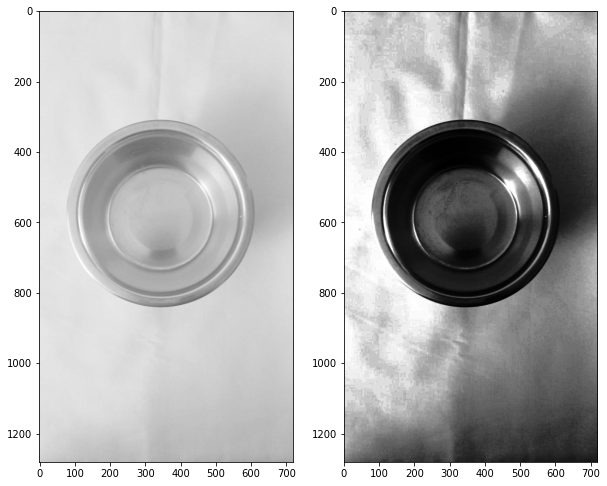

In [ ]:
sample_gray = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Exponencial/089ID13.jpeg")
sample_nornalized = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Normalized_Dataset/Exponencial-089ID13.jpeg")

figure, axarr = plt.subplots(1,2, figsize=(10, 10))
axarr[0].imshow(sample_gray, cmap='gray')
axarr[1].imshow(sample_nornalized, cmap='gray')

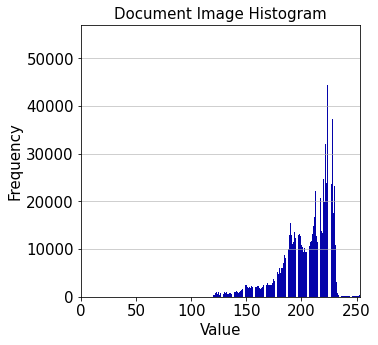

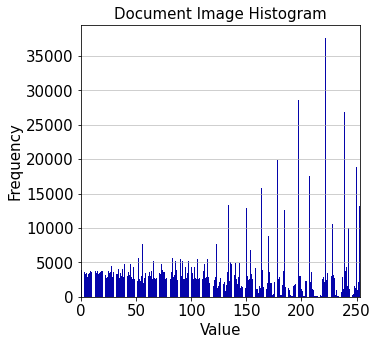

In [ ]:
histogram, edges = np.histogram(sample_gray, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

histogram_eq, edges_eq = np.histogram(sample_nornalized, bins=range(255))
plot_histogram(histogram_eq, edges_eq[:-1], 5)

### Filtro de média convolucional

Aplicação do filtro de equalização partindo de imagens com filtro exponencial.

In [ ]:
normalized_dataset(mean_folder)

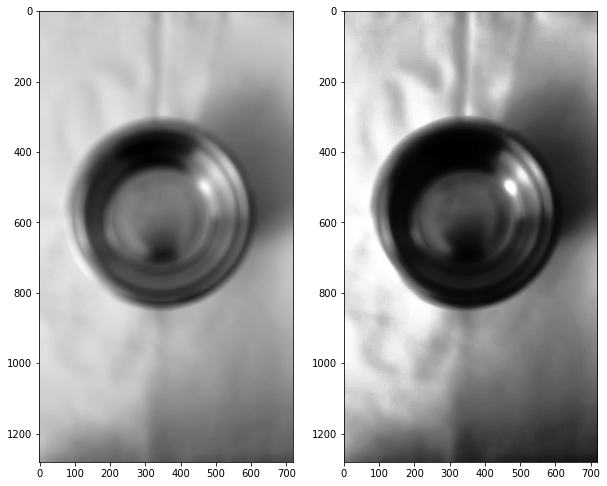

In [ ]:
sample_gray = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Filtro_media_conv/089ID13.jpeg")
sample_nornalized = image.imread("/content/gdrive/Shareddrives/Grupo Visão/EP2/Normalized_Dataset/Filtro_media_conv-089ID13.jpeg")

figure, axarr = plt.subplots(1,2, figsize=(10, 10))
axarr[0].imshow(sample_gray, cmap='gray')
axarr[1].imshow(sample_nornalized, cmap='gray')

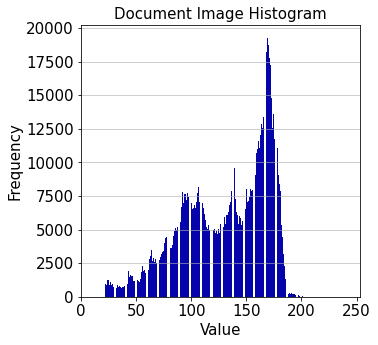

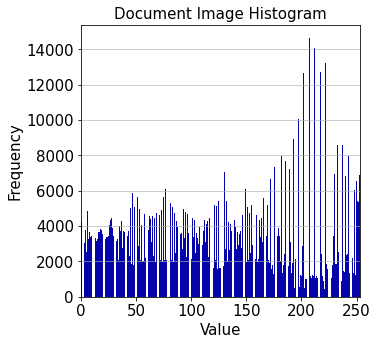

In [ ]:
histogram, edges = np.histogram(sample_gray, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

histogram_eq, edges_eq = np.histogram(sample_nornalized, bins=range(255))
plot_histogram(histogram_eq, edges_eq[:-1], 5)

## Análise por classes

O primeiro passo será agrupar todas as imagens do *augumentaion dataset* por classe.

In [ ]:
def group_by_class(path, number_class):
  os.chdir(path)

  files = os.listdir()

  def group(filename, number):
    delimiter = filename.find('-')
    key = int(filename[delimiter+1:delimiter+3])
    return number == key

  return [filename for filename in files if group(filename, number_class)]

### 1. Protótipo médio de cada classe

In [ ]:
def mean_images(list_class):
  os.chdir(normalized_folder)

  array = []
  for filename in list_class:
    img = image.imread(f"{normalized_folder}/{filename}")
    
    if len(array) > 0 and img.shape[0] == array[-1].shape[1]:
      img = np.array(img).transpose()

    array.append(img)

  return np.mean(array, axis=0)

#### Classe 01

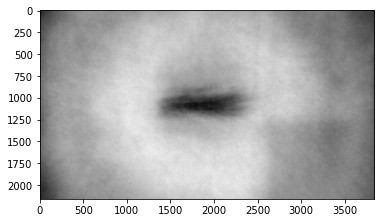

In [ ]:
class_01 = group_by_class(normalized_folder, 1)
mean_image_class_01 = mean_images(class_01)
plt.imshow(mean_image_class_01, cmap='gray');

#### Classe 02

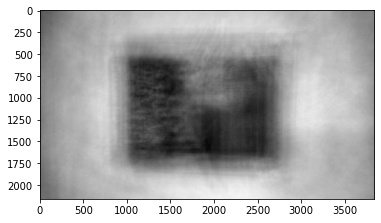

In [ ]:
class_02 = group_by_class(normalized_folder, 2)
mean_image_class_02 = mean_images(class_02)
plt.imshow(mean_image_class_02, cmap='gray');

#### Classe 03

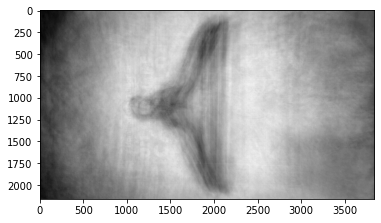

In [ ]:
class_03 = group_by_class(normalized_folder, 3)
mean_image_class_03 = mean_images(class_03)
plt.imshow(mean_image_class_03, cmap='gray');

#### Classe 04

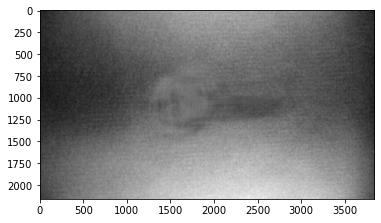

In [ ]:
class_04 = group_by_class(normalized_folder, 4)
mean_image_class_04 = mean_images(class_04)
plt.imshow(mean_image_class_04, cmap='gray');

#### Classe 05

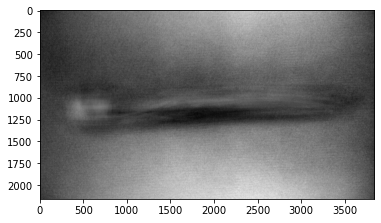

In [ ]:
class_05 = group_by_class(normalized_folder, 5)
mean_image_class_05 = mean_images(class_05)
plt.imshow(mean_image_class_05, cmap='gray');

#### Classe 06

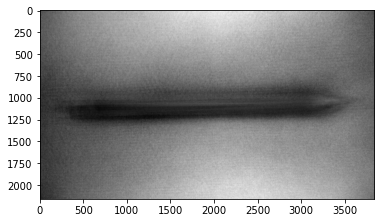

In [ ]:
class_06 = group_by_class(normalized_folder, 6)
mean_image_class_06 = mean_images(class_06)
plt.imshow(mean_image_class_06, cmap='gray');

#### Classe 07

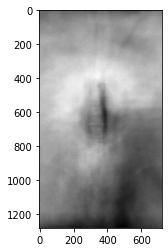

In [ ]:
class_07 = group_by_class(normalized_folder, 7)
mean_image_class_07 = mean_images(class_07)
plt.imshow(mean_image_class_07, cmap='gray');

#### Classe 08

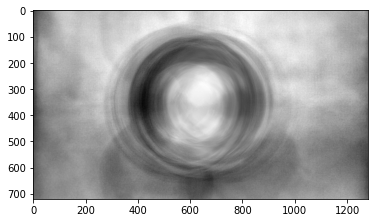

In [ ]:
class_08 = group_by_class(normalized_folder, 8)
mean_image_class_08 = mean_images(class_08)
plt.imshow(mean_image_class_08, cmap='gray');

#### Classe 09

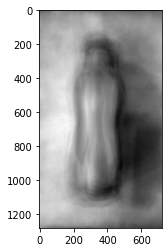

In [ ]:
class_09 = group_by_class(normalized_folder, 9)
mean_image_class_09 = mean_images(class_09)
plt.imshow(mean_image_class_09, cmap='gray');

#### Classe 10

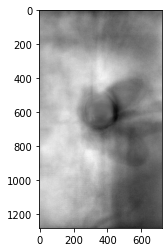

In [ ]:
class_10 = group_by_class(normalized_folder, 10)
mean_image_class_10 = mean_images(class_10)
plt.imshow(mean_image_class_10, cmap='gray');

### 2. Histograma médio de cada classe

#### Classe 01

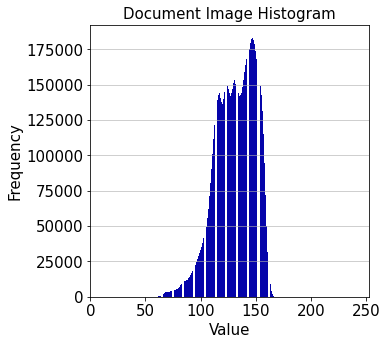

In [ ]:
histogram, edges = np.histogram(mean_image_class_01, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 02

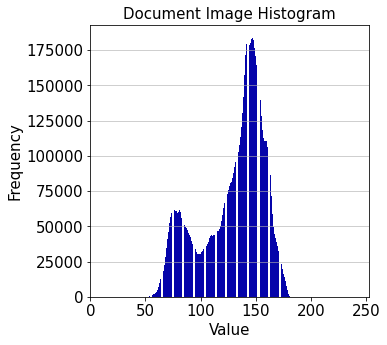

In [ ]:
histogram, edges = np.histogram(mean_image_class_02, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 03

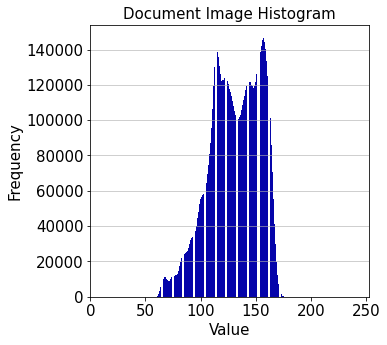

In [ ]:
histogram, edges = np.histogram(mean_image_class_03, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 04

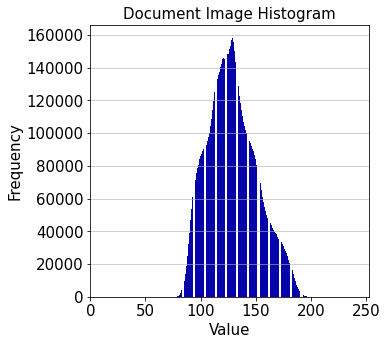

In [ ]:
histogram, edges = np.histogram(mean_image_class_04, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 05

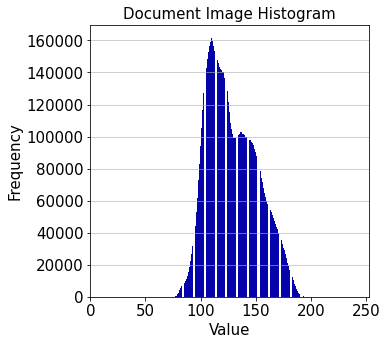

In [ ]:
histogram, edges = np.histogram(mean_image_class_05, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 06

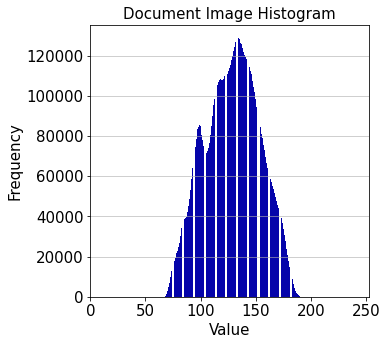

In [ ]:
histogram, edges = np.histogram(mean_image_class_06, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 07

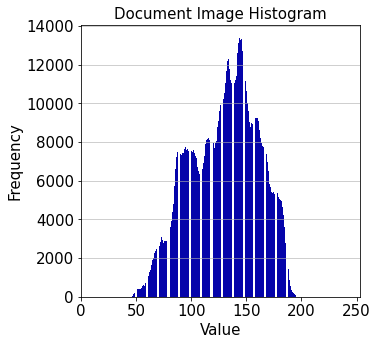

In [ ]:
histogram, edges = np.histogram(mean_image_class_07, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 08

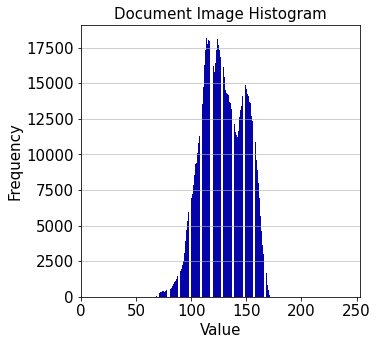

In [ ]:
histogram, edges = np.histogram(mean_image_class_08, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 09

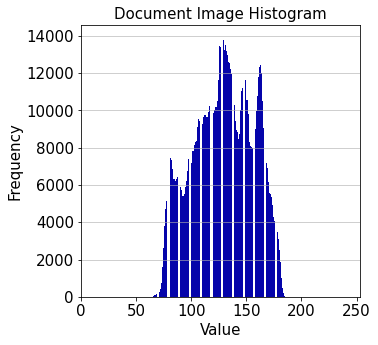

In [ ]:
histogram, edges = np.histogram(mean_image_class_09, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

#### Classe 10

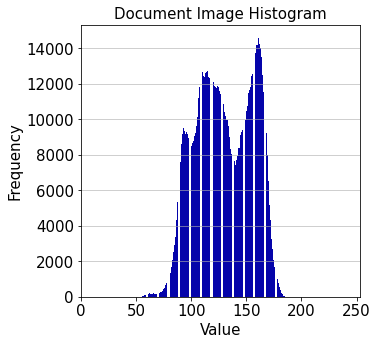

In [ ]:
histogram, edges = np.histogram(mean_image_class_10, bins=range(255))
plot_histogram(histogram, edges[:-1], 5)

### Variância do histograma de cada classe

#### Classe 01

Variância no contraste

In [ ]:
np.var(mean_image_class_01, axis=0)

array([77.46902539, 80.27402907, 84.46330269, ..., 19.63430291,
       20.00112369, 19.50434341])

Variância na frequencia

In [ ]:
np.var(mean_image_class_01, axis=1)

array([240.84510262, 242.46399709, 238.26046119, ..., 319.45948102,
       325.11968812, 324.40133345])

#### Classe 02

In [ ]:
np.var(mean_image_class_02, axis=0)

array([42.54384255, 41.36926021, 42.49736392, ..., 10.0455101 ,
        9.50987099,  9.89044191])

In [ ]:
np.var(mean_image_class_02, axis=1)

array([248.85142368, 247.71300822, 245.92582187, ..., 346.68882307,
       348.70214953, 349.00914466])

#### Classe 03

In [ ]:
np.var(mean_image_class_03, axis=0)

array([47.2799031 , 50.18338002, 58.28319491, ..., 22.94990404,
       23.8901637 , 24.54251818])

In [ ]:
np.var(mean_image_class_03, axis=1)

array([564.81606584, 567.8176618 , 564.68601917, ..., 474.27621164,
       475.74679477, 477.68497534])

#### Classe 04

In [ ]:
np.var(mean_image_class_04, axis=0)

array([80.13689917, 78.28238375, 78.13704931, ..., 78.90305377,
       80.3916023 , 82.66285557])

In [ ]:
np.var(mean_image_class_04, axis=0)

array([80.13689917, 78.28238375, 78.13704931, ..., 78.90305377,
       80.3916023 , 82.66285557])

#### Classe 05

In [ ]:
np.var(mean_image_class_05, axis=0)

array([42.27602524, 39.82391432, 38.0768485 , ..., 27.11356486,
       28.65892323, 33.18042598])

In [ ]:
np.var(mean_image_class_05, axis=1)

array([518.02387467, 517.37614507, 526.58419433, ..., 578.70589782,
       586.47059728, 588.45501679])

#### Classe 06

In [ ]:
np.var(mean_image_class_06, axis=0)

array([61.54174421, 60.64090671, 62.7314374 , ..., 57.4139757 ,
       57.62356084, 60.43564097])

In [ ]:
np.var(mean_image_class_06, axis=1)

array([509.64121495, 508.28605917, 515.38427079, ..., 623.90714411,
       626.67832515, 626.93548053])

#### Classe 07

In [ ]:
np.var(mean_image_class_07, axis=0)

array([ 286.82339159,  287.19994839,  293.01602812,  292.56099656,
        290.74276281,  286.57211894,  282.78572725,  274.37049477,
        271.50134644,  276.22722856,  284.23194596,  284.77763471,
        283.47680535,  284.70940155,  281.69635922,  284.74844979,
        275.54875361,  276.70962239,  277.19890807,  281.75843382,
        283.98200867,  291.84285056,  296.12249545,  295.14581165,
        298.96711075,  302.63347232,  300.81433288,  303.63726191,
        308.02291542,  313.86955789,  316.79743742,  313.70076666,
        319.03773954,  319.67127515,  323.54133677,  327.29737732,
        327.64941438,  326.37860784,  326.83606931,  319.45578973,
        322.04258528,  325.83523813,  331.22557614,  338.52090285,
        338.07964445,  343.05872522,  345.58297576,  341.13296598,
        339.62243206,  351.20399583,  353.81261564,  361.68263686,
        365.19382767,  361.8325742 ,  359.62243775,  361.28947882,
        365.81188285,  371.45724782,  372.05182432,  371.54657

In [ ]:
np.var(mean_image_class_07, axis=1)

array([ 46.25619166,  44.51689768,  43.42989335, ...,  98.56114277,
        98.38904186, 100.19659915])

#### Classe 08

In [ ]:
np.var(mean_image_class_08, axis=0)

array([52.59894653, 48.10640195, 44.54316667, ..., 94.29341458,
       88.087598  , 83.69200099])

In [ ]:
np.var(mean_image_class_08, axis=1)

array([140.69640109, 145.50398432, 146.15905437, 147.91362314,
       151.70707191, 151.31108011, 150.61822895, 150.25434738,
       154.11950993, 158.63392593, 158.94392393, 158.79075765,
       160.01942312, 159.05504972, 161.40176104, 162.53856924,
       158.09041644, 160.67496688, 163.00469621, 161.93241499,
       164.4925671 , 166.97045397, 167.58499466, 163.68285319,
       163.4363873 , 166.65195881, 167.43591141, 165.19774342,
       167.51653647, 169.10061584, 170.05945482, 167.619481  ,
       168.48314487, 171.22368392, 171.80789739, 170.39017901,
       170.01326415, 168.39602384, 169.4927778 , 169.22741418,
       166.56111157, 164.48005443, 164.71937266, 162.2158574 ,
       162.30470303, 163.66314427, 165.15322842, 165.86521533,
       160.64771514, 162.25836211, 163.68041318, 164.64242201,
       164.35319132, 160.55091288, 161.47034991, 165.80866015,
       168.54662091, 165.8631212 , 165.40668949, 160.59136998,
       160.36473336, 163.16399474, 160.3123601 , 161.47

#### Classe 09

In [ ]:
np.var(mean_image_class_09, axis=0)

array([105.8172248 , 107.07480466, 108.4205107 , 109.89244426,
       115.07353232, 115.65732076, 111.61560447, 110.23666963,
       109.51895587, 111.10205555, 111.55823166, 112.06077595,
       112.56065391, 113.74551892, 114.90099942, 114.34131939,
       110.69301207, 111.17039649, 110.05846312, 110.02927838,
       112.61049621, 115.4562718 , 115.68557032, 113.38329898,
       114.66245132, 115.26952139, 115.80709857, 115.87415524,
       115.61140476, 114.97891957, 114.4952197 , 114.34476075,
       117.98631237, 117.08235524, 116.67976985, 117.92944289,
       117.40687778, 116.47000632, 115.12152671, 115.87988427,
       116.3876671 , 119.29648357, 121.61018022, 121.34014654,
       118.59549209, 118.25547777, 120.63028416, 121.85046355,
       124.01372136, 123.82337337, 125.71511823, 129.99109535,
       131.87854869, 129.9515999 , 130.13726028, 132.25473694,
       132.97154797, 133.40481819, 134.26517109, 135.03128467,
       133.49054764, 132.50924783, 132.704288  , 130.85

In [ ]:
np.var(mean_image_class_09, axis=1)

array([ 69.03514663,  63.82769651,  59.05553535, ..., 116.6250097 ,
       105.21671306,  98.318867  ])

#### Classe 10

In [ ]:
np.var(mean_image_class_10, axis=0)

array([121.38622273, 125.39704709, 124.24547792, 125.93155743,
       128.16107438, 127.60249849, 129.02880045, 130.62474593,
       133.26359527, 136.24352376, 136.32455183, 137.13056119,
       140.95132124, 144.07548355, 146.41062247, 147.33305208,
       154.38797325, 156.40564042, 155.6389466 , 151.98439767,
       154.00399675, 158.92085386, 157.81072875, 156.21007804,
       163.94638633, 167.93256778, 168.34082824, 166.92186542,
       173.33824386, 179.31542423, 181.20206906, 179.79445546,
       180.03808754, 184.17118123, 187.03656417, 187.40177818,
       187.82222993, 187.89629855, 186.9101825 , 185.20050888,
       185.16757789, 190.22635624, 190.5611072 , 191.84230725,
       193.97377282, 191.86672263, 191.32688641, 196.02593828,
       194.58962446, 195.21293281, 197.29165047, 204.17016605,
       203.70097027, 200.04295311, 204.68483409, 206.29881117,
       201.04551954, 200.92381533, 207.76208659, 203.88447482,
       201.62871583, 207.52572221, 203.8308698 , 205.00

In [ ]:
np.var(mean_image_class_10, axis=1)

array([ 75.78844413,  74.42208647,  70.86547989, ..., 342.31842665,
       340.44469526, 343.54094695])